In [2]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Traffic_Voilation/Traffic_Voilatio_mean.csv', index_col='Unnamed: 0')

y = df.filter(like="voilation", axis=1)
X = df.drop('voilation', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X

,accidents,killed,injured,year,state
0,1977.39,643.84,1982.1,2017,0
1,31.00,17.00,20.0,2017,1
2,1977.39,643.84,1982.1,2017,2
3,1977.39,643.84,1982.1,2017,3
4,1977.39,643.84,1982.1,2017,4
...,...,...,...,...,...
715,0.00,0.00,0.0,2020,31
716,0.00,0.00,0.0,2020,32
717,86.00,23.00,74.0,2020,33
718,0.00,0.00,0.0,2020,34


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
def neighbor_training(X_train, X_test, y_train, y_test, n):
    cf = KNeighborsClassifier(n_neighbors=n)
    cf.fit(X_train, y_train.values.ravel())

    y_train_pred = cf.predict(X_train)
    y_pred = cf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    print("Node: {}, Acc: {}".format(n, accuracy))
    print("---------------------------------")

In [32]:
# for i in range (60,100):
#     neighbor_training(X_train, X_test, y_train, y_test, i)
neighbor_training(X_train, X_test, y_train, y_test, 5)

Node: 5, Acc: 0.38425925925925924
---------------------------------


D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [33]:
cf = KNeighborsClassifier(n_neighbors=5)
cf.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [34]:
y_pred = cf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)


0.38425925925925924


D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


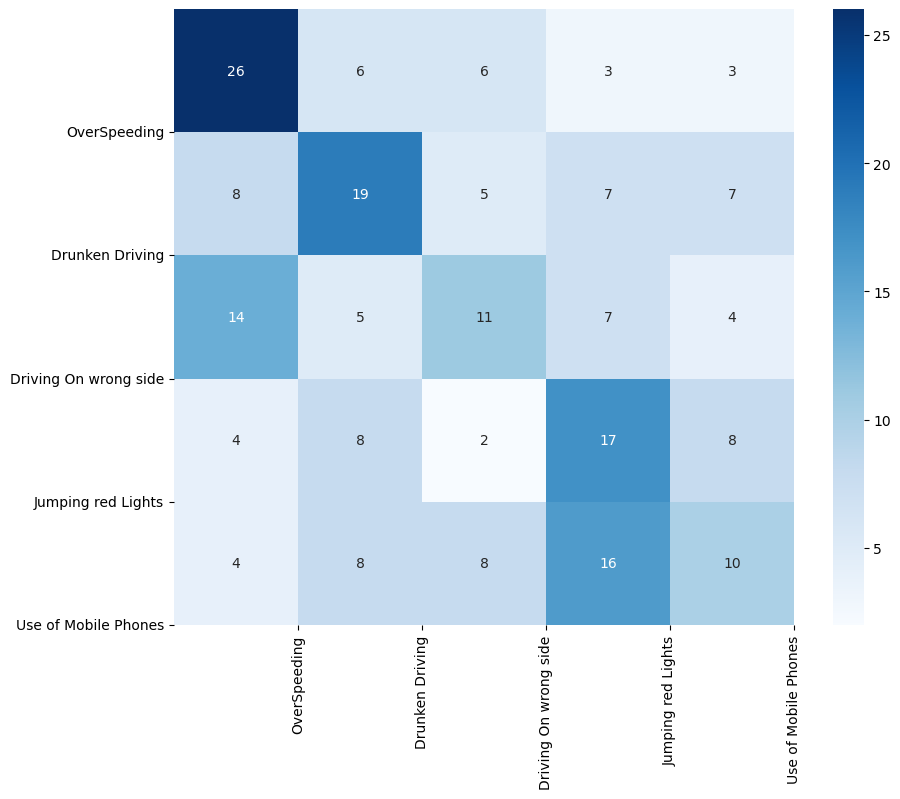

In [35]:
labels=['OverSpeeding','Drunken Driving','Driving On wrong side','Jumping red Lights','Use of Mobile Phones']
x=[1,2,3,4,5]
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xticks(x, labels, rotation = 90)
plt.yticks(x, labels, rotation = 0)
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.46      0.59      0.52        44
           2       0.41      0.41      0.41        46
           3       0.34      0.27      0.30        41
           4       0.34      0.44      0.38        39
           5       0.31      0.22      0.26        46

    accuracy                           0.38       216
   macro avg       0.37      0.39      0.37       216
weighted avg       0.38      0.38      0.37       216



In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/farhansayyed165/Highway-Data/main/Data/Traffic_Voilation/3mean_data.csv')

y = df.filter(like="voilation", axis=1)
X = df.drop('voilation', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def neighbor_training(X_train, X_test, y_train, y_test, n):
    cf = KNeighborsClassifier(n_neighbors=n)
    cf.fit(X_train, y_train.values.ravel())

    y_train_pred = cf.predict(X_train)
    y_pred = cf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    print("Node: {}, Acc: {}".format(n, accuracy))
    print("---------------------------------")


In [43]:
 for i in range (2,15):
    neighbor_training(X_train, X_test, y_train, y_test, i)
# neighbor_training(X_train, X_test, y_train, y_test, 5)



D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

Node: 2, Acc: 0.41203703703703703
---------------------------------
Node: 3, Acc: 0.39814814814814814
---------------------------------
Node: 4, Acc: 0.4212962962962963
---------------------------------
Node: 5, Acc: 0.41203703703703703
---------------------------------
Node: 6, Acc: 0.37962962962962965
---------------------------------
Node: 7, Acc: 0.37962962962962965
---------------------------------
Node: 8, Acc: 0.39814814814814814
---------------------------------
Node: 9, Acc: 0.39351851851851855
---------------------------------
Node: 10, Acc: 0.4166666666666667
---------------------------------
Node: 11, Acc: 0.3888888888888889
---------------------------------
Node: 12, Acc: 0.39351851851851855
---------------------------------
Node: 13, Acc: 0.37962962962962965
---------------------------------
Node: 14, Acc: 0.38425925925925924
---------------------------------


D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [44]:
cf = KNeighborsClassifier(n_neighbors=4)
cf.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [45]:
y_pred = cf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

0.4212962962962963


D:\Farhan Sayyed\Jupyter\CONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


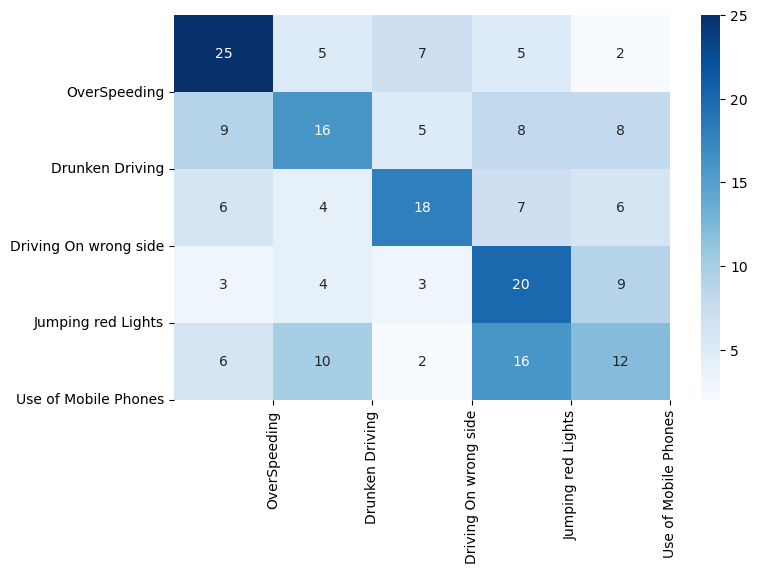

In [48]:
labels=['OverSpeeding','Drunken Driving','Driving On wrong side','Jumping red Lights','Use of Mobile Phones']
x=[1,2,3,4,5]
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xticks(x, labels, rotation = 90)
plt.yticks(x, labels, rotation = 0)
plt.show()